<a href="https://colab.research.google.com/github/ThuaneFranca/Numerico_Projeto.ipynb/blob/master/Num%C3%A9rico_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

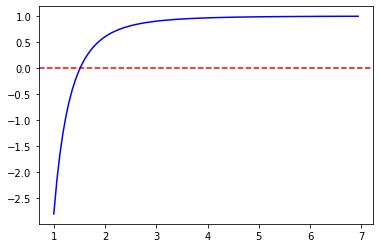

In [0]:
from matplotlib import pyplot as plt #biblioteca para plotar gráficos

# PROBLEMA 1 (3)

# para a resolução deste problema, declaramos os valores especificados 

Q = 20.0
g = 9.81

# e montamos as suas respectivas funções.
def A(y): return (3.0 * y) + ((y ** 2)/2.0)
def B(y): return 3.0 + y

def f(y): return 1 - ( (( Q ** 2.0 ) / (g * A(y) ** 3.0)) * B(y))

# A determinar a profundidade crítica gráficamente

# escolhemos um intervalo onde a função possívelmente passa por zero
# e criamos alguns pontos de dados [1,5], para que seja possível plotar 
pontos = 100


a, b = 1, 5
incremento = (abs(a)+abs(b)) / pontos

valores, posicoes = [], []
n = 1
i = 0
while i < pontos:
  posicoes.append(n)
  valores.append(f(n))
  n += incremento
  i += 1

plt.axhline(y=0, ls='--', color='r')
plt.plot(posicoes,valores, color='b') #bisseccao
plt.show()

In [0]:
# para resolução da B e C, implementamos os métodos da falsa posição e bissecção
def bisseccao(f, intervalo=[0,1], erro=0.001):
    
  a = intervalo[0]
  b = intervalo[1]
  
  m = 0.0
  it = 0

  while (abs(b-a) > erro) and (it < 100):
    it += 1
  
    m = (a + b) / 2
        
    if f(m) == 0: 
      print(f"bissecção - resultado exato para m = {m} em {it} iterações com presição de {erro}")
      return m
    
    elif f(m)*f(a) < 0:
      b = m
    else: 
      a = m
  else:
    print(f"bissecção - resultado final: {m} em {it} iterações com precisão de {erro}")  
    return m
  
def falsa_posicao(f, intervalo=[0,1], erro=0.001):
  
  x0 = intervalo[0]
  x1 = intervalo[1]
  x2 = x1
  it = 0

  while (min(abs(x1-x0), abs(x2)) > erro) and (it < 100):
    it += 1

    x2 = x1 - (f(x1) * (x1 - x0)) / (f(x1) - f(x0))
   
    if f(x2) == 0:
      print(f"falsa posição: resultado exato para x = {x2} em {it} iterações com precisão de {erro}");
      return x2
    elif abs(x2-x1) < erro:
      x0 = x2
    else:
      x1 = x2
  else:
    print(f"falsa posição - resultado final: {x2} em {it} iterações com precisao de {erro}")
    return x2
    

In [0]:
# B -Considerando o intervalo inicial [0.6, 2.6] e a precisão e = 10^−3
#usando o método da bisecçao;

bisseccao(f, intervalo=[0.6, 2.6], erro=0.001);

# C - Considerando o intervalo inicial [0.6, 2.6] e a precisão e = 10^−4 
# usando o método da falsa posição.

falsa_posicao(f, intervalo=[0.6, 2.6], erro=0.0001);

bissecção - resultado final: 1.5130859375 em 11 iterações com precisão de 0.001
falsa posição - resultado final: 1.5148078259634805 em 66 iterações com precisao de 0.0001


In [0]:
from math import e

pu_max = 80000
ku = 0.05
pu_min = 110000
ps_max = 320000
p0 = 10000
ks = 0.09

def pu(t): return pu_max * (e ** (ku * t)) + pu_min

def ps(t): return ps_max / (1 + abs((ps_max / p0) - 1) * (e ** (-1 * ks * t)))

valores1, posicoes1 = bisseccao(ps, intervalo=[0.45,1], erro=0.001)
valores2, posicoes2 = falsa_posicao(pu, intervalo=[0.45,1], erro=0.001)

bissecção - resultado final: 0.999462890625 em 10 iterações
método falsa posição - resultado final: -2.2116361481204493e+38 em 100 iterações


In [0]:
# QUESTÃO 4

# IMPLEMENTANDO-SE O MÉTODO DE NEWTON
def newton(f, df, x0, erro=0.001):

    it = 0
    x = x0
    while (abs(f(x)) > erro and it <= 50):
        x -= f(x)/df(x)
        it += 1      
    
    print(f"resultado {x} em {it} iterações com precisão de {erro}")

    
# e o método das secantes
def secantes(f, intervalo, erro):
    x0 = intervalo[0]
    x1 = intervalo[1]
    f0 = f(x0)
    
    for i in range(1,50):
      f1= f(x1)
      x2= x1-(x1-x0)*f1/(f1-f0);

      if abs(x2-x1) < erro or f(x2) == 0.0:
        print(f"secante - resultado {x0} com {i} iterações e precisão de {erro}")
        return x2
      
      x0 = x1
      x1 = x2 
      f0 = f1

In [0]:
from math import sin, cos, e

def f(x): return (7 * sin(x) * (e ** (x * -1))) - 1
#derivamos a f(x)
def df(x): return (7 * (e ** (x* -1)) * (cos(x) - sin(x)))
#enviamos os valores para o método de newton
newton(f,df, -4, erro=0.0001)


#A menor raiz positiva de f, usando o m´etodo de Secante, para as aproxima¸c˜oes iniciais x0 = 0 e
#x1 = 0.1, e a precis˜ao ǫ = 10−4

secantes(f, [0,0.1], erro=0.0001);


resultado -3.1477283471346684 em 5 iterações com precisão de 0.0001
secante - resultado 0.16922472001800504 com 4 iterações


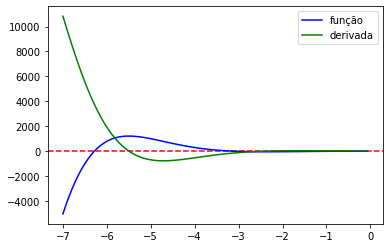

In [0]:
# escolhemos um intervalo onde a função possívelmente passa por zero
# e criamos alguns pontos de dados [1,5], para que seja possível plotar 
pontos = 100


a, b = -7, -0
incremento = (abs(a) + abs(b)) / pontos

valores, posicoes, derivadas = [], [], []
n = a
i = 0
while i < pontos:
  posicoes.append(n)
  valores.append(f(n))
  derivadas.append(df(n))
  n += incremento
  i += 1

plt.axhline(y=0, ls='--', color='r')
plt.plot(posicoes,valores, color='b', label='função')
plt.plot(posicoes,derivadas, color='g', label='derivada')
plt.legend()
plt.show()

In [0]:


def g(x):
	return math.pow(1-x,1/3.0)
	
def fpi(x, k):
	for i in range(k):
		print i, x, g(x)
		x = g(x)
	print 'The root is: ',
	return x

In [0]:
# 7 8(3), 9(2), 10(3)
# TODO: usar o método de jacobi em cima disso?
[5a, -15b
-5a, 25b, -10c
 0a, -10b, 15c, -5d, 0e
 0a,0b, -5c, 20d, -15e, 0f
 0a,-10b, 0c, -15d, 45e, -20f
 0a,0b,0c, -20d, 20e
 
 25a, -5b, -10c,
 
]
